<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/3_4_%ED%8A%B9%EC%9D%B4%EA%B0%92_%EB%B6%84%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 기본 셋팅

In [2]:
import numpy as np

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (12,6)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}
lightgreen = {"facecolor": "lightgreen"}
gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


#### - 정방행렬이 아닌 행렬은 고유분해와 비슷한 특이분해를 할 수 있다.

### 1) 특잇값과 특이벡터

1. 특이분해 or 특잇값 분해(singular value decompostion) : N X M 크기의 행렬 A를 3개의 행렬의 곱으로 나타내는 것
> $$A = U\Sigma V^T$$
> 1) $\Sigma \in \mathbf{R}^{N \times M}$ : 대각성분이 양수인 대각행렬이어야 한다. (큰 수 → 작은 수 배치)   
> 2) $U \in \mathbf{R}^{N \times N}$ : $N$차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교해야 한다.   
> 3) $U \in \mathbf{R}^{N \times N}$ : $M$차원 정방행렬로   모든 열벡터가 단위벡터이고 서로 직교해야 한다.

2. 위 조건을 만족하는 행렬을 다음과 같이 부른다.
> 1) 행렬 $\Sigma$의 대각성분들 : 특잇값(singular value)   
> 2) 행렬 $U$의 열벡터들 : 왼쪽 특이벡터(left singular vector)   
> 3) 행렬 $V$의 행벡터들 : 오른쪽 특이벡터(right singular vector)

3. 정리 : 특이분해는 모든 행렬에 대해 가능하다. 즉 어떤 행렬이 주어지더라도 위와 같이 특이분해할 수 있다.


### 2) 특이값 분해 행렬의 크기
- 특잇값의 개수는 행렬의 열과 행의 개수 중 작은 값과 같다.

1. 만약 $N > M$이면 $\Sigma$ 행렬이 $M$개의 특잇값(대각성분)을 가지고 다음처럼 아랫 부분이 영행렬이 된다.
> $$ 
\begin{align}
A = 
\begin{bmatrix}
\boxed{\begin{matrix} \\ \\ \\ \\ \\ \, u_1 \, \\ \\ \\ \\ \\ \\ \end{matrix}} \!\!\!\!& 
\boxed{\begin{matrix} \\ \\ \\ \\ \\ \, u_2 \, \\ \\ \\ \\ \\ \\ \end{matrix}} \!\!\!\!& 
\boxed{\begin{matrix} \\ \\ \\ \\ \\ \, u_3 \, \\ \\ \\ \\ \\ \\ \end{matrix}} \!\!\!\!& 
\cdots \!\!\!\!& 
\boxed{\begin{matrix} \\ \\ \\ \\ \\  u_M  \\ \\ \\ \\ \\ \\ \end{matrix}} \!\!\!\!&
\cdots \!\!\!\!& 
\boxed{\begin{matrix} \\ \\ \\ \\ \\ u_N \\ \\ \\ \\ \\ \\ \end{matrix}} 
\end{bmatrix}
\begin{bmatrix}
\boxed{\sigma_1 \phantom{\dfrac{}{}} \!\!} & 0 & 0 & \cdots & 0 \\
0 & \boxed{\sigma_2 \phantom{\dfrac{}{}} \!\!} & 0 & \cdots & 0 \\
0 & 0 & \boxed{\sigma_3 \phantom{\dfrac{}{}} \!\!} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots \\
0 & 0 & 0 & \cdots & \boxed{\sigma_M \phantom{\dfrac{}{}} \!\!} \\
0 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots &  & \vdots \\
0 & 0 & 0 & \cdots & 0 \\
\end{bmatrix}
\begin{bmatrix}
\boxed{\begin{matrix} & & & v_1^T & & & \end{matrix}} \\ 
\boxed{\begin{matrix} & & & v_2^T & & & \end{matrix}} \\ 
\vdots \\ 
\boxed{\begin{matrix} & & & v_M^T & & & \end{matrix}} \\ 
\end{bmatrix}
\end{align}
$$

2. 반대로 $N < M$이면 $\Sigma$ 행렬이 $N$개의 특잇값(대각성분)을 가지고 다음처럼 오른쪽 부분이 영행렬이 된다.
> $$ 
\begin{align}
A = \begin{bmatrix}
\boxed{\begin{matrix} \\ \\ \\ \, u_1 \, \\ \\ \\ \\ \end{matrix}} \!\!\!\!& 
\boxed{\begin{matrix} \\ \\ \\ \, u_2 \, \\ \\ \\ \\ \end{matrix}} \!\!\!\!& 
\cdots \!\!\!\!& 
\boxed{\begin{matrix} \\ \\ \\ u_N \\ \\ \\ \\ \end{matrix}} 
\end{bmatrix}
\begin{bmatrix}
\boxed{\sigma_1 \phantom{\dfrac{}{}} \!\!} & 0 & 0 & \cdots & 0 & 0 & \cdots & 0 \\
0 & \boxed{\sigma_2 \phantom{\dfrac{}{}} \!\!} & 0 & \cdots & 0 & 0 & \cdots & 0 \\
0 & 0 & \boxed{\sigma_3 \phantom{\dfrac{}{}} \!\!} & \cdots & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & & \vdots \\
0 & 0 & 0 & \cdots & \boxed{\sigma_N \phantom{\dfrac{}{}} \!\!} & 0 & \cdots & 0 \\
\end{bmatrix}
\begin{bmatrix}
\boxed{\begin{matrix} \quad & \quad & v_1^T & \quad & \quad \end{matrix}} \\ 
\boxed{\begin{matrix} \quad & \quad & v_2^T & \quad & \quad \end{matrix}} \\ 
\boxed{\begin{matrix} \quad & \quad & v_3^T & \quad & \quad \end{matrix}} \\ 
\vdots \\ 
\boxed{\begin{matrix} \quad & \quad & v_N^T & \quad & \quad \end{matrix}} \\ 
\vdots \\ 
\boxed{\begin{matrix} \quad & \quad & v_M^T & \quad & \quad \end{matrix}} \\ 
\end{bmatrix}
\end{align}
$$


3. 행렬의 크기로 표시
> $$
\begin{align}
N\;\left\{\phantom{\begin{matrix} \\ \\ \\ \\ \\ \end{matrix}}\right.\!\!
\overbrace{
\boxed{
\begin{matrix}
\; &   & \; \\
\; &   & \; \\
\; & A & \; \\
\; &   & \; \\
\; &   & \; \\
\end{matrix}
}}^{\large M}
=
N\;\left\{\phantom{\begin{matrix} \\ \\ \\ \\ \\ \end{matrix}}\right.\!\!
\overbrace{
\boxed{
\begin{matrix}
& & \\
& & \\
& U & \\
& & \\
& & \\
\end{matrix}
}}^{\large M}
\;
\overbrace{
\boxed{
\begin{matrix}
\; &   & \; \\
\; & \Sigma & \; \\
\; &   & \; \\
\end{matrix}
}}^{\large M}
\;
\overbrace{
\boxed{
\begin{matrix}
\; &   & \; \\
\; & V^T & \; \\
\; &   & \; \\
\end{matrix}
}}^{\large M}
\!\!\left.\phantom{\begin{matrix} \\ \\ \\ \end{matrix}}\right\}M
\end{align}
$$
$$
\begin{align}
N\;\left\{\phantom{\begin{matrix} \\ \\ \\ \end{matrix}}\right.\!\!
\overbrace{
\boxed{
\begin{matrix}
\quad & &   & & \quad \\
\quad & & A & & \quad \\
\quad & &   & & \quad \\
\end{matrix}
}}^{\large M}
=
N\;\left\{\phantom{\begin{matrix} \\ \\ \\  \end{matrix}}\right.\!\!
\overbrace{
\boxed{
\begin{matrix}
\begin{matrix}
\, & & \; \\
\, & U \; \\
\, & & \; \\
\end{matrix}
\end{matrix}
}}^{\large N}
\;
\overbrace{
\boxed{
\begin{matrix}
\, & & \; \\
\, & \Sigma \; \\
\, & & \; \\
\end{matrix}
}}^{\large N}
\;
\overbrace{
\boxed{
\begin{matrix}
\quad & &   & & \quad \\
\quad & & V^T & & \quad \\
\quad & &   & & \quad \\
\end{matrix}
}}^{\large M}
\!\!\left.\phantom{\begin{matrix} \\ \\ \\ \end{matrix}}\right\}N
\end{align}
$$

#### 예제

행렬 $A$의 특이분해 축소형은 다음과 같다.
> $$
\begin{align}
A = 
\begin{bmatrix}
3 & -1 \\
1 & 3 \\
1 & 1
\end{bmatrix}
= 
\begin{bmatrix}
 -\frac{1}{\sqrt{6}} &  \frac{2}{\sqrt{5}} \\ 
 -\frac{2}{\sqrt{6}} & -\frac{1}{\sqrt{5}} \\ 
 -\frac{1}{\sqrt{6}} & 0 
\end{bmatrix}
\begin{bmatrix}
\sqrt{12} & 0        \\
       0  & \sqrt{10} \\
\end{bmatrix}
\begin{bmatrix}
-\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
 \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} 
\end{bmatrix}
\end{align}
$$

### 3) 파이썬을 사용한 특이분해

numpy.linalg 서브패키지와 scipy.linalg 서브패키지에서는 특이분해를 할 수 있는 `svd()` 명령을 제공한다. 오른쪽 특이행렬은 전치행렬로 출력된다는 점에 주의하라.

In [4]:
from numpy.linalg import svd

A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)

print(A)

print(U)
print(S)
print(np.diag(S, 1)[:, 1:])
print(VT)

print(U @ np.diag(S, 1)[:, 1:] @ VT)
# N > M 
# (N, N)(N, M)(M, M) = (3, 3)(3, 2)(2, 2)

[[ 3 -1]
 [ 1  3]
 [ 1  1]]
[[-4.08248290e-01  8.94427191e-01 -1.82574186e-01]
 [-8.16496581e-01 -4.47213595e-01 -3.65148372e-01]
 [-4.08248290e-01 -2.06937879e-16  9.12870929e-01]]
[3.46410162 3.16227766]
[[3.46410162 0.        ]
 [0.         3.16227766]
 [0.         0.        ]]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[[ 3. -1.]
 [ 1.  3.]
 [ 1.  1.]]


In [10]:
U2, S2, VT2 = svd(A, full_matrices=False)
print(U2)
print(S2)
print(np.diag(S2))
print(VT2)
print(U2 @ np.diag(S2) @ VT2)
# N > M 
# (N, M)(M, M)(M, M) = (3, 2)(2, 2)(2, 2)

[[-4.08248290e-01  8.94427191e-01]
 [-8.16496581e-01 -4.47213595e-01]
 [-4.08248290e-01 -2.06937879e-16]]
[3.46410162 3.16227766]
[[3.46410162 0.        ]
 [0.         3.16227766]]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[[ 3. -1.]
 [ 1.  3.]
 [ 1.  1.]]


#### 연습 문제 3.4.1

NumPy를 사용하여 다음 행렬을 특잇값 분해를 한다(축소형이 아닌 방법과 축소형 방법을 각각 사용한다). 또한 다시 곱해서 원래의 행렬이 나오는 것을 보여라.

$$ 
\begin{align}
B =
\begin{bmatrix}
3 & 2 & 2 \\
2 & 3 & -2
\end{bmatrix}
, \;\; 
C =
\begin{bmatrix}
2 & 4 \\
1 & 3 \\
0 & 0 \\
0 & 0 \\
\end{bmatrix}
\end{align}
$$


In [60]:
from numpy.linalg import svd

B = np.array([[3, 2, 2], [2, 3, -2]]) # (2, 3) = (2, 2)(2, 3)(3, 3) 
C = np.array([[2, 4], [1, 3], [0, 0], [0, 0]]) # (4, 2) = (4, 4)(4, 2)(2, 2) 

U, S, VT = svd(B)
U2, S2, VT2 = svd(B, full_matrices=False)

print(U @ np.diag(S, -1)[1:,:] @ VT)
print(U2 @ np.diag(S2) @ VT2)

[[ 3.  2.  2.]
 [ 2.  3. -2.]]
[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [74]:
U, S, VT = svd(C)
U2, S2, VT2 = svd(C, full_matrices=False)

print(U @ np.diag(S, 2)[:,2:] @ VT)
print(U2 @ np.diag(S2) @ VT2)

[[2. 4.]
 [1. 3.]
 [0. 0.]
 [0. 0.]]
[[2. 4.]
 [1. 3.]
 [0. 0.]
 [0. 0.]]


### 4) 특잇값과 특이벡터의 관계

1. 행렬 $V$ : 정규직교(orthonormal)행렬이므로 전치행렬이 역행렬
> $$
\begin{align}
V^T = V^{-1}
\end{align}
$$

2. 특이분해된 등식의 양변에 $V$를 곱하면,
> $$ 
\begin{align}
AV = U\Sigma V^TV = U\Sigma
\end{align}
$$
> $$ 
\begin{align}
A\begin{bmatrix}
v_1 & v_2 & \cdots & v_M
\end{bmatrix}
= 
\begin{bmatrix}
u_1 & u_2 & \cdots & u_N
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & \cdots \\
0 & \sigma_2 & \cdots \\
\vdots & \vdots & \ddots \\
\end{bmatrix}
\end{align}
$$

3. $M$ > $N$ 일 때,
> $$
\begin{align}
\begin{bmatrix}
Av_1 & Av_2 & \cdots & Av_N
\end{bmatrix}
= 
\begin{bmatrix}
\sigma_1u_1 & \sigma_2u_2 & \cdots & \sigma_Nu_N
\end{bmatrix}
\end{align}
$$

4. $N$ > $M$ 일 때,
> $$
\begin{align}
\begin{bmatrix}
Av_1 & Av_2 & \cdots & Av_M
\end{bmatrix}
= 
\begin{bmatrix}
\sigma_1u_1 & \sigma_2u_2 & \cdots & \sigma_Mu_M
\end{bmatrix}
\end{align}
$$

5. 즉, $i$번째 특잇값 $\sigma_i$와 특이벡터 $u_i$, $v_i$는 다음과 같은 관계가 있다.
> $$
\begin{align}
Av_i = \sigma_i u_i \;\; (i=1, \ldots, \text{min}(M,N))
\end{align}
$$
> - 이 관계는 고유분해와 비슷하지만 고유분해와는 달리 좌변과 우변의 벡터가 다르다.

#### 예제 

위에서 예로 들었던 행렬의 경우,

$$
\begin{align}
A =
\begin{bmatrix}
3 & -1 \\
1 & 3 \\
1 & 1
\end{bmatrix}
=
U\Sigma V^T
= 
\begin{bmatrix}
 -\frac{1}{\sqrt{6}} &  \frac{2}{\sqrt{5}} \\ 
 -\frac{2}{\sqrt{6}} & -\frac{1}{\sqrt{5}} \\ 
 -\frac{1}{\sqrt{6}} & 0 
\end{bmatrix}
\begin{bmatrix}
\sqrt{12} & 0        \\
       0  & \sqrt{10} \\
\end{bmatrix}
\begin{bmatrix}
-\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
 \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} 
\end{bmatrix}
\end{align}
$$
- $A = (3,2), N(3) > M(2) $

$$
\begin{align}
Av_1 = \sigma_1 u_1 =
\begin{bmatrix}
3 & -1 \\
1 & 3 \\
1 & 1
\end{bmatrix}
\begin{bmatrix}
-\frac{1}{\sqrt{2}} \\
-\frac{1}{\sqrt{2}} 
\end{bmatrix}
=
\sqrt{12}
\begin{bmatrix}
-\frac{1}{\sqrt{6}} \\ -\frac{2}{\sqrt{6}} \\ -\frac{1}{\sqrt{6}}
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
Av_2 = \sigma_2 u2 =
\begin{bmatrix}
3 & -1 \\
1 & 3 \\
1 & 1
\end{bmatrix}
\begin{bmatrix}
 \frac{1}{\sqrt{2}} \\
-\frac{1}{\sqrt{2}} 
\end{bmatrix}
=
\sqrt{10}
\begin{bmatrix}
 \frac{2}{\sqrt{5}} \\  
-\frac{1}{\sqrt{5}} \\ 
 0 \\ 
\end{bmatrix}
\end{align}
$$


#### 연습 문제 3.4.2

NumPy를 사용하여 다음 행렬에 대해 

$$
\begin{align}
Av_i = \sigma_i u_i
\end{align}
$$

가 성립한다는 것을 계산으로 보여라.

$$ 
\begin{align}
B =
\begin{bmatrix}
3 & 2 & 2 \\
2 & 3 & -2
\end{bmatrix}
, \;\; 
C =
\begin{bmatrix}
2 & 4 \\
1 & 3 \\
0 & 0 \\
0 & 0 \\
\end{bmatrix}
\end{align}
$$


In [76]:
from numpy.linalg import svd

B = np.array([[3, 2, 2], [2, 3, -2]])          # (2, 3) 
C = np.array([[2, 4], [1, 3], [0, 0], [0, 0]]) # (4, 2) 

U, S, VT = svd(B, full_matrices=False)
print(B @ VT.T)
print((np.diag(S) @ U.T).T)

[[-3.53553391 -2.12132034]
 [-3.53553391  2.12132034]]
[[-3.53553391 -2.12132034]
 [-3.53553391  2.12132034]]


In [77]:
U, S, VT = svd(C, full_matrices=False)
print(C @ VT.T)
print((np.diag(S) @ U.T).T)

[[-4.46716435 -0.21081425]
 [-3.14809647  0.29914646]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[[-4.46716435 -0.21081425]
 [-3.14809647  0.29914646]
 [ 0.          0.        ]
 [ 0.          0.        ]]


### 5) 특이분해와 고유분해의 관계

1. 특이분해와 고유분해의 관계는 다음과 같다.
> $$ 
\begin{align}
A^TA^{} 
= (V^{} \Sigma^T U^T)( U^{}\Sigma^{} V^T) 
= V^{} \Lambda^{} V^T 
\end{align}
$$
> 1) 행렬 $A$의 $S^2$(특이값 제곱) =  분산 행렬의 $\Lambda$(고윳값)   
> 2) 행렬 $A$의 $V^T$(오른쪽 특이벡터) = 분산행렬 $A^TA^{}$의 $V^T$고유벡터가 된다.

2. $\Lambda$은 $N$ > $M$ 일 때, 
> $$
\begin{align}
\Lambda
= 
\begin{bmatrix}
\sigma_1^2 & 0 & \cdots & 0 \\
0 & \sigma_2^2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_M^2  \\
\end{bmatrix}
\end{align}
$$

3. $N$ < $M$ 일 때
> $$
\begin{align}
\Lambda
= 
\begin{bmatrix}
\sigma_1^2 & 0 & \cdots & 0 & \cdots & 0 \\
0 & \sigma_2^2 & \cdots & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & \sigma_N^2 & \cdots & 0 \\
\vdots & \vdots & \cdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0 & \cdots & 0 \\
\end{bmatrix}
= \text{diag}(\sigma_1^2, \sigma_2^2, \cdots, \sigma_N^2, 0, \cdots, 0)
\end{align}
$$




In [78]:
A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)

w, V = np.linalg.eig(A.T @ A)
print(w)       # A.T A의 고윳값
print(S ** 2)  # A의 특잇값의 제곱
print(V)       # A.T A의 고유벡터
print(VT.T)    # A의 오른쪽 특이벡터

[12. 10.]
[12. 10.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


#### 연습 문제 3.4.3

NumPy를 사용하여 행렬 $A$의 왼쪽 특이벡터가 행렬 $AA^T$의 고유벡터가 된다는 것을 보여라.

$$
\begin{align}
A = 
\begin{bmatrix}
3 & -1 \\
1 & 3 \\
1 & 1
\end{bmatrix}
\end{align}
$$

In [91]:
A = np.array([[3, -1], [1, 3], [1, 1]])

U, S, VT = svd(A)
print(U)

w, V = np.linalg.eig(A @ A.T)
idx = np.argsort(w ** 2)[::-1]
w = w[idx]
V = V[:, idx]
print(V)

[[-4.08248290e-01  8.94427191e-01 -1.82574186e-01]
 [-8.16496581e-01 -4.47213595e-01 -3.65148372e-01]
 [-4.08248290e-01 -2.06937879e-16  9.12870929e-01]]
[[-4.08248290e-01 -8.94427191e-01  1.82574186e-01]
 [-8.16496581e-01  4.47213595e-01  3.65148372e-01]
 [-4.08248290e-01  5.07704275e-16 -9.12870929e-01]]


### 6) 1차원 근사

1. 2차원 평면 위에 3개의 2차원 벡터 $a_1, a_2, a_3$가 있다. 원점을 지나면서 모든 점들과 가능한 한 가까이 있는 직선은 다음과 같다. 직선의 방향을 나타내는 단위 벡터를 $w$라고 한다.

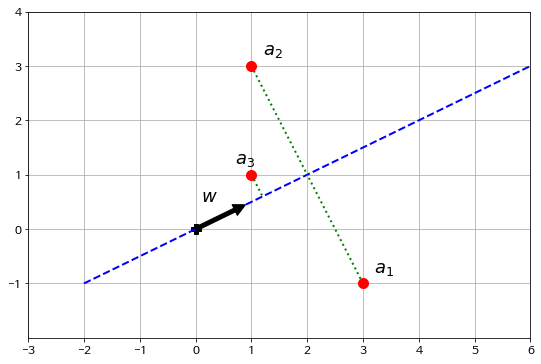

In [92]:
w = np.array([2, 1]) / np.sqrt(5)
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])

black = {"facecolor": "black"}

plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 8], [-1, 4], 'b--', lw=2)
plt.plot([a1[0], 2], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 1], 'g:', lw=2)
plt.plot([a3[0], 1.2], [a3[1], 0.6], 'g:', lw=2)
plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6)
plt.ylim(-2, 4)
plt.show()

2. 벡터 $w$와 점 $a_i$의 거리의 제곱은 다음처럼 계산할 수 있다.(연습 문제 3.1.9)
> $$
\begin{align}
\Vert a_i^{\perp w}\Vert^2 = \Vert a_i\Vert^2 - \Vert a_i^{\Vert w}\Vert^2 = \Vert a_i\Vert^2 - (a_i^Tw)^2
\end{align}
$$ 

2. 벡터 $a_1, a_2, a_3$를 행벡터로 가지는 행렬 $A$를 가정
> $$
\begin{align}
A = \begin{bmatrix} a_1^T \\ a_2^T \\ a_3^T \end{bmatrix}
\end{align}
$$

3. 행벡터의 놈의 제곱의 합은 행렬의 놈이므로 모든 점들과의 거리의 제곱의 합은 행렬의 놈으로 계산된다. (연습 문제 2.3.2)
> $$ 
\begin{align}
\begin{aligned}
\sum_{i=1}^3 \Vert a_i^{\perp w}\Vert^2 
= \sum_{i=1}^3 \Vert a_i\Vert^2 - \sum_{i=1}^3  (a_i^Tw)^2
= \Vert A \Vert^2 - \Vert Aw\Vert^2 \\
\end{aligned}
\end{align}
$$ 

4. 점 $a_i$의 위치가 고정되어 있으므로 행렬 $A$의 놈 값은 고정되어 있다. 따라서 이 값이 가장 작아지려면 $\Vert Aw\Vert^2$의 값이 가장 크게 만드는 $w$를 찾아야 한다.이 문제는 다음처럼 수식으로 쓸 수 있다.
> $$ 
\begin{align}
\arg\max_w \Vert Aw \Vert^2 
\end{align}
$$

### 7) 1차원 근사의 풀이

1. 위에서 예로 든 행렬 $A \in \mathbf{R}^{3 \times 2}$를 특이분해하면 2개의 특잇값, 왼쪽/오른쪽 특이벡터를 가진다. 이를 각각 다음처럼 이름붙인다.
 * 첫 번째 특잇값: $\sigma_1$, 첫 번째 왼쪽 특이벡터 $u_1 \in \mathbf{R}^{3}$, 첫 번째 오른쪽 특이벡터 $v_1 \in \mathbf{R}^{2}$ 
 * 두 번째 특잇값: $\sigma_2$, 두 번째 왼쪽 특이벡터 $u_2 \in \mathbf{R}^{3}$, 두 번째 오른쪽 특이벡터 $v_2 \in \mathbf{R}^{2}$ 

2. 첫 번째 특잇값 $\sigma_1$은 두 번째 특잇값 $\sigma_2$보다 같거나 크고, A에 오른쪽 특이벡터를 곱하면 왼쪽 특이벡터 방향이 된다.
> $$
\begin{align}
\sigma_1 \geq \sigma_2
\end{align}
$$
> $$
\begin{align}
A v_1 = \sigma_1 u_1, \;\; A v_2 = \sigma_2 u_2
\end{align}
$$
> - 오른쪽 특이벡터 $v_1, v_2$는 서로 직교하므로 (같은 방향이 아니라서) 선형독립이고, 2차원 평면공간의 기저벡터가 될 수 있다.

3. $\Vert Aw\Vert$의 값이 가장 크게 만드는 $w$를 찾아야 하는데 $w$는 2차원 벡터이므로 2차원 평면공간의 기저벡터인 $v_1, v_2$의 선형조합으로 표현할 수 있다.
> $$
\begin{align}
w = w_{1} v_1 + w_{2} v_2 (\text{ 단위 벡터로 다음 조건을 만족필요 } w_{1}^2 + w_{2}^2 = 1)
\end{align} $$
> $$ 
\begin{align}
\begin{aligned}
\Vert Aw\Vert^2 
&= \Vert A(w_{1} v_1 + w_{2} v_2)\Vert^2 \\
&= \Vert w_{1}Av_1 + w_{2}Av_2 \Vert^2 \\
&= \Vert w_{1} \sigma_1 u_1 + w_{2} \sigma_2 u_2 \Vert^2 \\
&= \Vert w_{1} \sigma_1 u_1 \Vert^2 + \Vert w_{2} \sigma_2 u_2 \Vert^2 \;\; \text{(직교)} \\
&= w_{1}^2 \sigma_1^2 \Vert  u_1 \Vert^2 + w_{2}^2 \sigma_2^2 \Vert  u_2 \Vert^2 \\
&= w_{1}^2 \sigma_1^2 + w_{2}^2 \sigma_2^2  \;\; \text{(단위벡터)}\\
\end{aligned}
\end{align}
$$

4. $\sigma_1 > \sigma_2 > 0$ 이므로 $w_{1}^2 + w_{2}^2 = 1$라는 조건을 만족하면서 위 값을 가장 크게 하는 $w_{1}, w_{2}$값은
>  $$
\begin{align}
w_{1} = 1, w_{2} = 0
\end{align}
$$
$$
\begin{align}
w = v_1
\end{align}
$$
$$
\begin{align}
\Vert Aw\Vert = \Vert Av_1\Vert = \Vert \sigma_1 u_1\Vert = \sigma_1 \Vert u_1\Vert = \sigma_1
\end{align}
$$

5. ex) 행렬 $A$
> $$
\begin{align}
A = 
\begin{bmatrix}
3 & -1 \\
1 & 3 \\
1 & 1
\end{bmatrix}, \;
v_1 = 
\begin{bmatrix}
\frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
\Vert A \Vert^2 - \Vert Aw\Vert^2
=\Vert A \Vert^2 - \sigma_1^2
\end{align}
$$

In [93]:
np.linalg.norm(A)**2 - S[0]**2

9.999999999999998

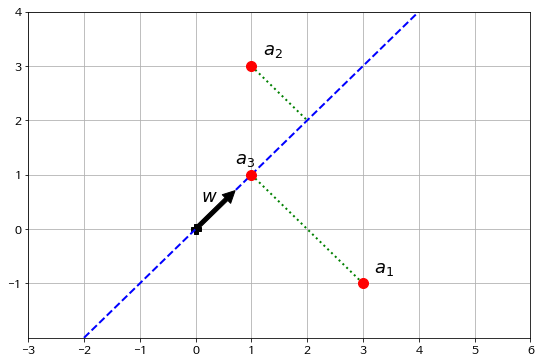

In [94]:
w = np.array([1, 1]) / np.sqrt(2)
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])

black = {"facecolor": "black"}

plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 4], [-2, 4], 'b--', lw=2)
plt.plot([a1[0], 1], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 2], 'g:', lw=2)
plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6)
plt.ylim(-2, 4)
plt.show()

### 8) 일반적인 풀이

1. 만약 $N=3$이 아니라 일반적인 경우에는 다음처럼 풀 수 있다. 
> $$
\begin{align}
\begin{aligned}
\Vert Aw \Vert^2 
&= \sum_{i=1}^{N}  (a_i^Tw)^2 \\
&= \sum_{i=1}^{N}  (a_i^Tw)^T(a_i^Tw) \\
&= \sum_{i=1}^{N}  w^Ta_ia_i^Tw \\
&= w^T \left( \sum_{i=1}^{N}  a_ia_i^T \right) w \\
&= w^T A^TA w \\
\end{aligned}
\end{align}
$$

2. 분산행렬의 고유분해 공식을 이용하면,
> $$
\begin{align}
\begin{aligned}
w^T A^TA w 
&= w^T V \Lambda V^T w \\
&= w^T \left( \sum_{i=1}^{M}  \sigma^2_iv_iv_i^T \right) w \\
&= \sum_{i=1}^{M}\sigma^2_i(w^Tv_i)(v_i^Tw) \\
&= \sum_{i=1}^{M}\sigma^2_i\Vert v_i^Tw\Vert^2 \\
\end{aligned}
\tag{3.4.51}
\end{align}
$$

3. 이 식에서 $M$은 0이 아닌 특잇값 개수다.
> $$ 
\begin{align}
\arg\max_w \Vert Aw \Vert^2 = \arg\max_w \sum_{i=1}^{M}\sigma^2_i\Vert v_i^Tw\Vert^2 
\end{align}
$$
> - 이 값을 가장 크게 하려면 $w$를 가장 큰 특잇값에 대응하는 오른쪽 고유벡터 $v_1$으로 해야 한다. 

### 9) 랭크-1 근사문제

1. $a_i$를 $w$에 투영한 벡터는 다음과 같다.

$$
\begin{align}
a^{\Vert w}_i = (a_i^Tw)w
\end{align}
$$

2. $w$ 벡터를 이용하면 $N$개의 $M$차원 벡터 $a_1, a_2, \cdots, a_N\;(a_i \in \mathbf{R}^M)$를 1차원으로 투영(projection)하여 가장 비슷한 $N$개의 1차원 벡터 $a^{\Vert w}_1, a^{\Vert w}_2, \cdots, a^{\Vert w}_N\;(a^{\Vert w}_i \in \mathbf{R}^1)$를 만들 수 있다. 
> $$
\begin{align}
A'=
\begin{bmatrix}
\left(a^{\Vert w}_1\right)^T \\
\left(a^{\Vert w}_2\right)^T \\
\vdots \\
\left(a^{\Vert w}_N\right)^T
\end{bmatrix}
=
\begin{bmatrix}
a_1^Tw^{}w^T \\
a_2^Tw^{}w^T \\
\vdots \\
a_N^Tw^{}w^T
\end{bmatrix}
=
\begin{bmatrix}
a_1^T \\
a_2^T \\
\vdots \\
a_N^T
\end{bmatrix}
w^{}w^T
=
Aw^{}w^T
\end{align}
$$
> - 이 답은 원래 행렬 $A$에 랭크-1 행렬 $w^{}w^T$를 곱해서 원래의 행렬 $A$와 가장 비슷한 행렬 $A'$을 만드는 문제와 같다.

3. 따라서 문제를 랭크-1 근사문제(rank-1 approximation problem)라고도 한다.
$$ 
\begin{align}
\arg\min_w \Vert A - A' \Vert = \arg\min_w \Vert A^{} - A^{}w^{}w^T \Vert 
\end{align}
$$


### 10) $K$차원 근사

1. $N$개의 $M$차원 벡터 $a_1, a_2, \cdots, a_N\;(a_i \in \mathbf{R}^M)$를 1차원이 아니라 정규직교인 기저벡터 $w_1, w_2, \cdots, w_K$로 이루어진 $K$차원 벡터공간으로 투영하여 가장 비슷한 $N$개의 $K$차원 벡터 $a^{\Vert w}_1, a^{\Vert w}_2, \cdots, a^{\Vert w}_N\;$를 만들기 위한 정규직교 기저벡터 $w_1, w_2, \cdots, w_K$를 찾는 문제를 생각하자. 이 문제는 랭크-$K$ 근사문제라고 한다.

2. 기저벡터행렬을 $W$라고 하자.
> $$ 
\begin{align}
W = \begin{bmatrix} w_1 & w_2 & \cdots & w_K \end{bmatrix}
\end{align}
$$

3. 정규직교 기저벡터에 대한 벡터 $a_i$의 투영 $a^{\Vert w}_i$는 각 기저벡터에 대한 내적으로 만들 수 있다.
> $$
\begin{align}
\begin{aligned}
a^{\Vert w}_i 
&= 
(a_i^Tw_1)w_1 +
(a_i^Tw_2)w_2 +
\cdots
+ (a_i^Tw_K)w_K \\
\end{aligned}
=
\sum_{k=1}^K (a_i^Tw_k)w_k
\end{align}
$$

4. 벡터 $a_1, a_2, \cdots, a_N$를 행벡터로 가지는 행렬 $A$를 가정하면 
> $$ 
\begin{align}
A = \begin{bmatrix} a_1^T \\ a_2^T \\ \vdots \\ a_N^T \end{bmatrix}
\end{align}
$$

5. 모든 점들과의 거리의 제곱의 합은 다음처럼 행렬의 놈으로 계산할 수 있다.
> $$ 
\begin{align}
\begin{aligned}
\sum_{i=1}^N \Vert a_i^{\perp w}\Vert^2 
&= \sum_{i=1}^N \Vert a_i\Vert^2 - \sum_{i=1}^N \Vert a^{\Vert w}_i\Vert^2 \\
&= \Vert A \Vert^2 - \sum_{i=1}^N \Vert a^{\Vert w}_i\Vert^2 \\
&= \sum_{i=1}^N \sum_{k=1}^K \Vert (a_i^Tw_k)w_k \Vert^2 \\
&= \sum_{i=1}^N \sum_{k=1}^K \Vert a_i^Tw_k \Vert^2 \\
&= \sum_{k=1}^K w_k^T A^TA w_k \\
\end{aligned}
\end{align}
$$ 

6. 분산행렬의 고유분해를 사용하면
> $$
\begin{align}
\begin{aligned}
\sum_{k=1}^K w_k^T A^TA w_k 
&= \sum_{k=1}^K w_k^T V \Lambda V^T w_k \\
&= \sum_{k=1}^K w_k^T \left( \sum_{i=1}^{M}  \sigma^2_iv_iv_i^T \right) w_k \\
&= \sum_{k=1}^K \sum_{i=1}^{M}\sigma^2_i\Vert v_i^Tw_k\Vert^2 \\
\end{aligned}
\end{align}
$$

7. 정리 : 가장 큰 $K$개의 특잇값에 대응하는 오른쪽 특이벡터가 기저벡터일 때 가장 값이 커진다.


### 11) 랭크-K 근사문제

1. 오른쪽 기저벡터 중 가장 큰 $K$개의 특잇값에 대응하는 오른쪽 특이벡터가 우리가 찾는 기저벡터가 된다.

2. 이 문제는 다음처럼 랭크-$K$ 근사문제의 형태로 만들 수도 있다.
> $$ 
\begin{align}
\begin{aligned}
a^{\Vert w}_i 
&= 
(a_i^Tw_1)w_1 +
(a_i^Tw_2)w_2 +
\cdots
+ (a_i^Tw_K)w_K \\
&=
\begin{bmatrix} w_1 & w_2 & \cdots & w_K \end{bmatrix}
\begin{bmatrix} a_i^Tw_1 \\ a_i^Tw_2 \\ \vdots \\ a_i^Tw_K \end{bmatrix} \\
&=
\begin{bmatrix} w_1 & w_2 & \cdots & w_K \end{bmatrix}
\begin{bmatrix} w_1^T \\ w_2^T \\ \vdots \\ w_K^T \end{bmatrix} a_i \\
&=
WW^Ta_i
\end{aligned}
\end{align}
$$

3. 이러한 투영벡터를 모아놓은 행렬 $A'$
> $$
\begin{align}
A'=
\begin{bmatrix}
\left(a^{\Vert w}_1\right)^T \\
\left(a^{\Vert w}_2\right)^T \\
\vdots \\
\left(a^{\Vert w}_N\right)^T
\end{bmatrix}
=
\begin{bmatrix}
a_1^TW^{}W^T \\
a_2^TW^{}W^T\\
\vdots \\
a_N^TW^{}W^T
\end{bmatrix}
=
\begin{bmatrix}
a_1^T \\
a_2^T \\
\vdots \\
a_N^T
\end{bmatrix}
W^{}W^T
=
AW^{}W^T
\end{align}
$$

4. 이 문제는 원래 행렬 $A$에 랭크-K 행렬 $W_{}W^T$를 곱해서 원래의 행렬 $A$와 가장 비슷한 행렬 $A'$을 만드는 문제와 같다.
> $$ 
\begin{align}
\arg\min_{w_1,\cdots,w_K} \Vert A - AW^{}W^T \Vert 
\end{align}
$$
